# Hypothesis Testing
© Explore Data Science Academy

## Learning Objectives:
In this train you will learn how to:

* Understand the fundamentals of Hypothesis Testing;
* Understand and differentiate between Type I and Type II errors;
* Test the equality of means for known and unknown population variance; and
* Test goodness of fit and sample variances using the chi-squared distribution.

## Outline
This train is structured as follows: 

* An introduction into Hypothesis testing;
* One-sided vs. two-sided hypothesis tests;
* Type I and Type II errors;
* Testing equality of means: known population variance; 
* Useful distributions for hypothesis testing;
* Testing equality of means: unknown population variance; 
* Testing equality of variances: F-distribution; and
* Testing goodness of fit and sample variances: chi-squared distribution.

## Introduction

The art of data science lies in understanding the story behind data and what it is telling us. 

In this train, we will be covering the fundamentals of **hypothesis testing**, an important component in statistical inference - a powerful tool to help us understand our data. In essence, we consider our data to be the result of an experiment which allows us to confirm or reject some initial or [*a priori*](https://en.wikipedia.org/wiki/A_priori_and_a_posteriori) hypothesis we have about a key aspect of the distribution of the underlying data.

Typically we refer to this *a priori* hypothesis as the **null hypothesis**, often denoted $H_0$. Quite often you'll see it set up as a description of what would be rather dull if it were true, and in those cases, the real excitement comes from situations where you can reject the null hypothesis. For example, we might have two versions of our website marketing the Explore Data Science Academy and set up a null hypothesis that they are equally likely to result in new applicants clicking on the 'Apply Now' button. The fascinating and actionable insight would come from the data confirming that we can reject the null, based on which we would adopt the more successful version and bin the one that wasn't likely to yield results.

So how do we accept or reject a hypothesis? First of all, we need to know something about the distribution of what we're testing (in the example above, that might be the difference between the mean click-through rate under 'Web Design A' and that under 'Web Design B', which under our null hypothesis would be zero). Then we use what we know about that distribution to determine how likely it is that our sample data would have been observed if the null hypothesis is true. If that likelihood is sufficiently low, then we conclude that we can reject the null hypothesis.

## Hypothesis testing

Let's start the illustration of this with an example concerning one observation of a random variable with a known distribution. Suppose we know that the height of data scientists around the globe is normally distributed with a mean of 1.7 metres and a standard deviation of 10 cm. If this is the true distribution, then we can easily answer questions such as: "how likely is it that a random person drawn from the population of data scientists would be 1.5m tall, or shorter?" Let's compute this, and plot where on the distribution this point lies.

First, let's import the necessary packages.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

Now let's calculate the probability and plot the distribution.

The probability that a random data scientist has a height of 1.5 m is 2.28 %


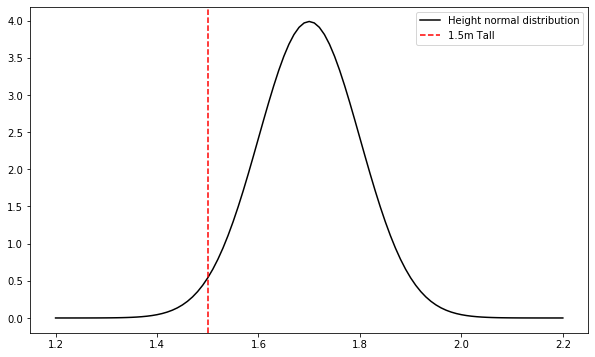

In [2]:
x = np.arange(1.2,2.2,0.01)    # Range of values for height from 1.2m to 2.2m
mu = 1.7                       # mu -> distribution mean = 1.7m
sigma = 0.1                    # sigma -> standard deviation = 0.1m

# We now calculate f(x), the probability density function of our normal distribution. 
f = st.norm.pdf(x, loc = mu, scale = sigma)

p = st.norm.cdf(1.5, loc = mu, scale = sigma)
print(f'The probability that a random data scientist has a height of 1.5 m is {np.round(p*100,2)} %') # F(1.5), i.e. probability of observing a height <= 1.5m

# Plot the results
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,f,'k', label = 'Height normal distribution')
plt.axvline(x = 1.5, color = 'r', linestyle = '--', label = '1.5m Tall')
plt.legend()
plt.show()

We can see that only a relatively small proportion of the probability weight lies below the 1.5m mark, and our computation tells us that the probability of a random individual from this population being 1.5m tall or less is about 2.3%. So we would only expect to observe a height as low as this about once in every 44 random draws.

With hypothesis testing, we are following a very similar idea, but turning things on their head a little. Here we don't know the population parameters for sure, but are [*hypothesising*](https://en.wikipedia.org/wiki/Hypothesis) what they are. The question we're asking is effectively the reverse of what we did above: given an observed sample mean, how likely is it that the hypothesised population mean is the true population mean? To answer this question using the normal distribution, we must know what the distribution of the sample mean is, given the null hypothesis. Fortunately, we can calculate the sample mean: $\bar{X} \sim N \left( \mu, \frac{\sigma^2}{n} \right)$. Here $\mu$ (mean) and $\sigma^2$ (variance) are the parameters under the null hypothesis, and $n$ is the size of the sample.

To test our null hypothesis, we calculate a **test statistic**: the size of which tells us whether we can accept or reject the null hypothesis. It should be clear that the data can never tell us completely whether or not the hypothesis is true; this is ultimately a probabilistic judgement. Maybe "Web Design A" is just as good as "Web Design B", but it just so happened that all the people who were going to apply to the Explore Academy ended up seeing the latter rather than former... but this is unlikely, and that is the point.

Statistical inference involves deciding how unlikely we want our data to be before we can reject the null hypothesis. This level of likelihood is known as the **significance level**: if there is less than a 5% chance of having observed our data by chance if the null hypothesis is true, then we say that our outcome is significant at the 5% level (which is a common choice of cut-off in practice, though one should be wary of applying this mindlessly). 

Say we conduct a sample among 100 Academy students for their heights and observe a sample mean of 1.682m. We can go ahead and calculate the test statistic as follows:  

In [3]:
st.norm.cdf(1.682, loc = 1.7, scale = (0.1 / 100**0.5)) # Function to create test statistic for our example

0.035930319112925664

The output is 0.0359. This tells us if the null hypothesis holds, there is only a 3.6% probability of observing a sample mean this low with a random sample of 100 students, and we might therefore have reason to doubt about whether the true population mean is as high as 1.7m. But in order to have a real sense of the likelihood of the null hypothesis being true, we also need to be clear about what alternative hypothesis we're testing.

## One-sided vs. two-sided hypothesis tests

How we frame this alternative hypothesis determines whether our test is one-sided or two-sided. So for the null hypothesis:

$$H_0: \mu = 1.7$$

we might have as our alternative hypothesis that the true population mean is less than 1.7m:

$$H_1: \mu < 1.7,$$

or we could allow for the possibility that if it's not truly 1.7m, it might be higher or lower, in which case we would frame our alternative hypothesis as:

$$H_1: \mu \ne 1.7.$$

Suppose that we've chosen a significance level of 5% at which we will reject our null hypothesis. For our one-sided alternative hypothesis, the rejection region is the lower 5% (left tail of the distribution), as in this region there is a more than 95% probability that the true population mean is less than 1.7m. For the two-sided hypothesis, however, we care about both the lower and upper tails (left and right regions), and given that the normal distribution is symmetric, our rejection region will be the 2.5% tails at both ends of the bell curve. 

Having a visual might help to make it clear:

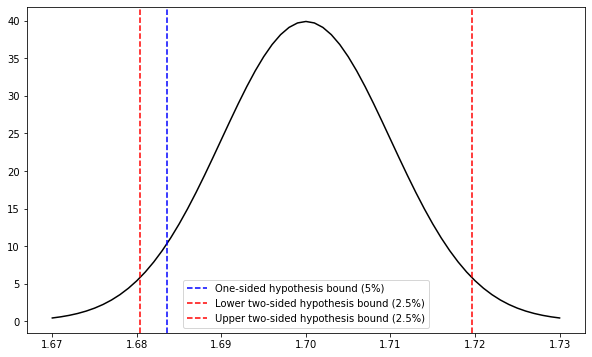

In [5]:
x = np.arange(1.67,1.73,0.001)
mu = 1.7
sigma = 0.1/10 # <-- Standard deviation / squareroot of sample size

# Now calculate f(x) - the probability distribution function of a standard normal.
f = st.norm.pdf(x, loc = mu, scale = sigma)

# Get values for the various significance points
r1 = st.norm.ppf(0.05, loc = mu, scale = sigma) # <-- 5% lower tail
r2_L = st.norm.ppf(0.025, loc = mu, scale = sigma) # <-- 2.5% lower tail
r2_H = st.norm.ppf(0.975, loc = mu, scale = sigma) # <-- 2.5% upper tail

# Form the plot.
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,f,'k')
plt.axvline(x = r1, color = 'b', linestyle = '--', label = 'One-sided hypothesis bound (5%)')
plt.axvline(x = r2_L, color = 'r', linestyle = '--', label = 'Lower two-sided hypothesis bound (2.5%)')
plt.axvline(x = r2_H, color = 'r', linestyle = '--', label = 'Upper two-sided hypothesis bound (2.5%)')
plt.legend()
plt.show()

Any observed sample mean to the left of the blue line would lead to a rejection of the one-sided hypothesis, while any observed sample mean to the left of the leftmost red line OR to the right of the rightmost would lead to a rejection of the two-sided hypothesis.

Let's see how that would play out with our example: we have a $Z$-statistic of -1.8, which is associated with a cumulative distribution function of 0.0359. We can interpret this as follows:

- the probability (known as a $p$-value for the one-sided alternative hypothesis) of observing a sample mean as low as 1.682m, given the null hypothesis, is 0.0359. Since this is less than 0.05, we would reject the null hypothesis at a 5% significance level.

- the probability ($p$-value for the two-sided hypothesis) of observing a sample mean at least 1.8cm away from the hypothesised population mean of 1.7m is however 0.0359 + 0.0359 = 0.0718 (because of the symmetry of the normal distribution). Since this exceeds 0.05, we cannot reject the null hypothesis at the 5% level.

So which type of alternative hypothesis should you use? Well, it depends. If there is a specific reason for a one-sided hypothesis (say we're investigating take-up rates on a direct marketing offer, and we're only concerned about the risk of this being lower than our null hypothesis suggests), then that's what you'll do, but if the intention is merely to investigate whether the null hypothesis is reasonable, then generally a two-sided alternative hypothesis will be preferred.

## False positives and false negatives: Type I and Type II errors

In hypothesis testing, there are two types of errors that can be committed. The first is Type I errors also known as False positives and is the likelihood of falsely rejecting a null hypothesis which is in fact true. The second is Type II errors which are known as False negatives which entail accepting (i.e. fail to reject) a null hypothesis which is in fact false, this can be summarised as seen below:


<img src="https://github.com/Explore-AI/Pictures/blob/master/hypothesis_testing_Errors.jpg?raw=true"
     style="float: center; padding-bottom=0.5em"
     width=50%px/>

What happens when we change the significance level? Well, as we bring it down, it becomes harder and harder to reject the null hypothesis. This reduces the risk of false positives, this probability by definition, is the chosen significance level because the essence of the reasoning we've followed above is that the $p$-value reflects the probability of observing as extreme a sample mean as we have observed by chance if the null hypothesis is true.

So reducing that risk may sound like an unambiguously good thing, until you realise that reducing the significance level simultaneously increases the risk of false negatives. There is no neat mapping of significance level onto the risk of committing a Type II error. Choosing the appropriate significance level is therefore a balancing act between the risks of these two types of errors.

## Testing equality of means: known population variance

We've seen above how one would test a sample mean on the basis of a population mean, assuming that the population variance is known. Another situation in which we might have an interest is comparing two samples and testing whether or not the populations from which they're drawn have the same mean.

Suppose that we have two sample means which we denote $\bar{X}$ and $\bar{Y}$ respectively, drawn from populations with means $\mu_X$ and $\mu_Y$ and variances $\sigma^2_X$ and $\sigma^2_Y$ respectively:

$$\bar{X} \sim N \left( \mu_X, \frac{\sigma^2_X}{n_X} \right),  \bar{Y} \sim N \left( \mu_Y, \frac{\sigma^2_Y}{n_Y} \right),$$

where $n_X$ and $n_Y$ denote the sizes of the respective samples.

Under the null hypothesis we can compute the $Z$-statistic using the following derived equation:

$$Z = \displaystyle \frac{\mu_X - \mu_Y}{\sqrt{ \frac{\sigma^2_X}{n_X} + \frac{\sigma^2_Y}{n_Y}}}.$$

The derivation of the equation above is beyond the scope of this train, but the application of it can be used to test the hypothesis in the same way as before.

# More Useful Distributions for Hypothesis Testing

### t-distribution

The **t-distribution** also known as the  student’s t-distribution is a probability distribution that is used to estimate population parameters when the sample size is small and/or when the population variance is unknown.  In 1908, [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) published the distribution of the $t$-statistic below under a pseudonym, Student, allegedly because his employers (Guinness) were not happy for his identity to be revealed, so you will often hear reference to Student's $t$-distribution. 

Of interest to Gosset was the question of the distribution of:

$$t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}},$$


This distribution has an extra parameter, namely the degrees of freedom: if a random variable $X$ follows the $t$-distribution with $m$ degrees of freedom, we write that $X \sim t_m.$

Let's have a look at how this distribution, with varying degrees of freedom, compares to the standard normal.

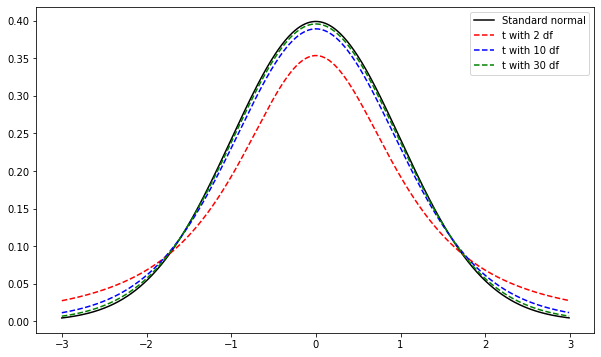

In [6]:
x = np.arange(-3,3,0.01)

# Calculate f(x) - standard normal
f_sn = st.norm.pdf(x)
f_t2 = st.t.pdf(x, df = 2)
f_t10 = st.t.pdf(x, df = 10)
f_t30 = st.t.pdf(x, df = 30)

# Plot the results
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, f_sn, 'k', label = "Standard normal")
plt.plot(x, f_t2, '--r', label = "t with 2 df")
plt.plot(x, f_t10, '--b', label = "t with 10 df")
plt.plot(x, f_t30, '--g', label = "t with 30 df")
plt.legend()
plt.show()

The plot clearly illustrates that as the degrees of freedom increase, the $t$-distribution gets closer and closer to the standard normal. But with smaller degrees of freedom, the curves are flatter, with greater weight in the tails.

So let's dive into degrees of freedom so that we know which $t$-distribution curve we should be using in our hypothesis testing when we don't know the population variance. We can calculate the sample variance:

$$s^2_X = \displaystyle \frac{1}{n-1} \sum_{t=1}^n (X_t - \bar{x})^2.$$
 
The reason that we divide by $n-1$, rather than $n$, is that we lose a **degree of freedom** here because we've had to use the sample mean $\bar{x}$ as our estimate of $\mu$: the sample mean together with $n-1$ of the observations determine the value of the $n$th observation, so this is no longer a free parameter. There is only one possible value that $n^{th}$ observation can take, given the other observations and the sample mean. 

To generalise this rule, a degree of freedom is lost every time we have to estimate a parameter. In the case of the $t$-distribution, we are using the sample variance to estimate the population variance, and a necessary step along the way is using our sample mean to estimate our population mean. Hence we lose a degree of freedom, and our sample variance $s^2_X$ has $n-1$ degrees of freedom for a sample of size $n$. Hence $n-1$ will be the divisor in our computation of sample variance, and $n-1$ will be the number of degrees of freedom of the $t$-distribution we will use for hypothesis testing. In other words, our sample statistic:

$$t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}} \sim t_{n-1}.$$

So let's go ahead and test an actual hypothesis by repeating the example above, instead of 10cm being the population standard deviation, let this be the sample standard deviation $s$ (the square root of the sample variance $s^2$). So our statistic of -1.8 is now distributed $t_{99}$, and we test a one-sided hypothesis as follows:


In [7]:
st.t.cdf(-1.8, df = 99)

0.03745318912890882

So the $p$-value for the one-sided hypothesis is now 0.0375, which is just higher than the 0.0359 computed under the standard normal distribution with a  known population variance. This is as expected given that we have a reasonable sample of 100 students, but what if we'd observed the same results from a sample of 10? Then our $p$-value would be computed as follows with 9 degrees of freedom:

In [7]:
st.t.cdf(-1.8, df = 9)

0.05269533579320446

Here we would be unable to reject the null hypothesis at the 5% level. The smaller sample means more weight in the tails, implying it becomes harder to reject a given hypothesis with a given sample outcome as the sample gets smaller.

## Testing equality of means: unknown population variance

We won't go into the mathematical details here (we'll leave that for the super-enthusiastic among you on a rainy Saturday afternoon), but using the $t$-distribution to test whether two means are equal requires making the initial assumption that the two population variances, though unknown, are equal. We then make an estimate for the pooled variance of the two samples as follows:

$$s^2 = \frac{ (n_X-1) s_X^2 + (n_Y - 1) s_Y^2}{n_X + n_Y - 2}.$$

Notice the denominator above: we estimate both sample means before estimating the pooled variance, so we lose two degrees of freedom. We then evaluate the following test statistic for the null hypothesis that the means are equal:

$$t_{n_X+n_Y-2} = \frac {\bar{X} - \bar{Y}}{s \sqrt{\frac{1}{n_X} + \frac{1}{n_Y}}}.$$

Once again the derivation of this is beyond the scope of this train, but the application is exactly as above.

## Testing equality of variances: F-distribution

You may have been troubled by that assumption of equal variances required to test equality of means: what if they're not equal? Maybe we should test that before going down the $t$-test path. The relevant test statistic for this is the $F$-statistic: the $F$-distribution describes the shape of probabilities of the ratio between two sample variances. Continuing with our previous notation, with $s^2_X$ and $s^2_Y$ representing the variances of our two samples, we say that the ratio of these sample variances follows the $F$-distribution with $n_X - 1$ and $n_Y - 1$ degrees of freedom (note: two individual degrees of freedom parameters, as opposed to one for the $t$-distribution), or mathematically:

$$\frac{s_X^2}{s_Y^2} \sim F_{n_X-1,n_Y-1}.$$

Let's see what the $F$-distribution looks like for different degrees of freedom:

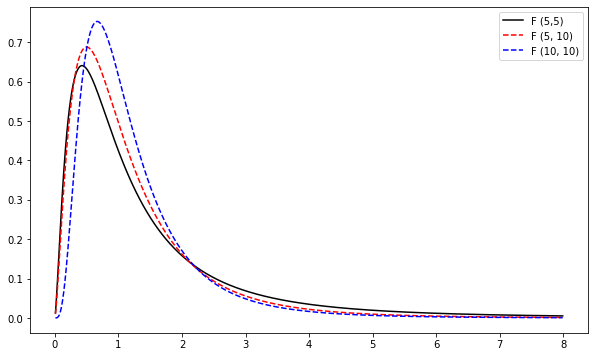

In [8]:
x = np.arange(0.01,8,0.01)

# Calculate f(x) for F distribution
f_1 = st.f.pdf(x, dfn = 5, dfd = 5)
f_2 = st.f.pdf(x, dfn = 5, dfd = 10)
f_3 = st.f.pdf(x, dfn = 10, dfd = 10)

# Plot the results
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, f_1, 'k', label = "F (5,5)")
plt.plot(x, f_2, '--r', label = "F (5, 10)")
plt.plot(x, f_3, '--b', label = "F (10, 10)")
plt.legend()
plt.show()

A few features stand out:

* The $F$- distribution is defined only over positive values: since both sample variances are positive, their ratio must also be a positive number; 

* It is, unlike the normal and $t$-distributions, asymmetric (those of you who've studied a bit of statistics before may recognise it as being positively skewed, with a long tail to the right of the distribution);

* The distribution peak is in the region of 1, which is of course the expected value under the null hypothesis of equal variances.

Let's perform a test: suppose that we have samples {$X$} and {$Y$} with the following key statistics:

$$n_X = 40, n_Y = 23, s_X^2 = 12.5, s_Y^2 = 20.$$

Then our test statistic is 0.625, and we compute a $p$-value as follows:


In [9]:
st.f.cdf(12.5 / 20, dfn = 39, dfd = 22)

0.09800944659489354

Clearly we cannot reject the null hypothesis of equal variances at the 5% level, despite the fact that they appear to be so far apart, whether our alternative hypothesis is one-sided or two-sided.

It's worth noting that the $t$- and $F$-tests rely on the assumption of normally distributed variables. The Central Limit Theorem guarantees that statistics such as the sample mean and sample variance will be approximately normally distributed for large samples, but for small samples we can go astray if the underlying observations do not themselves follow a normal distribution.

## Testing goodness of fit and sample variances: chi-squared distribution

Next we are going to be covering a very important and versatile distribution, the chi-squared ($\chi^2$) distribution. It has a number of uses, but for the purposes of this train we will focus only on its application in tests of goodness of fit, i.e. how well a given model fits the observed data. 

Let's start with an example with numerical data. Suppose we are advising a factory which produces dingbats: they package their dingbats in groups of 10 and keep track of the number of reject dingbats which had to be thrown away for each successful pack of 10. They've given us this data, and we would like to model the number of rejects before getting to 10 successful dingbats as following a negative binomial process with parameters $r = 10$ and $p = 0.8$, i.e. that there is an 80% probability of a given dingbat not being a reject. Now let's compare the data for 100 packages (the variable `obs` below, recording the number of packages for which there were the corresponding number of rejects):

In [11]:
n = 100
exp = st.nbinom.pmf(range(7), n = 10, p = 0.8) * n

obs = [13, 21, 19, 21, 15, 5, 6]    # Actual observed: 13 with 0 rejects, 21 with 1 reject and so on 

obs_0_5 = exp[0:5]
exp[6] = 100 - np.sum(obs_0_5)  # So the last value is the expected number of observations of 6 or more

Now we have the actual and observed number of packages with the respective number of rejects. Our next step is to compute a test statistic. For each possible number of rejects considered (with 6 or more as our final category), we take the difference between actual and observed numbers and then square this, before dividing by the expected number for each cell; we then sum these. (This practice of squaring differences is going to crop up a little later on, when we investigate linear regression.) It turns out that the resulting test statistic follows **approximately** the $\chi^2$ distribution, with $n-1$ degrees of freedom where $n$ is the number of cells we consider (7 in our case: each possible number of rejects from 0 to 5 inclusive, plus 6 or more as our final category). In other words, with $X_i$ denoting each observed value and $E_i$ each expected value:

$$\displaystyle \sum_{i=1}^n \frac{(X_i - E_i)^2}{E_i} = \sum_{i=1}^n \frac{X_i^2}{E_i} - n \sim \chi^2_{n-1}.$$

The chi-squared distribution is a reasonable approximation provided the expected frequencies are all above a minimum value: 5 is the general rule of thumb here, which is the reason that we terminated our data set at 6 or more rejects.

Let's compute this test statistic for our data.

In [10]:
chi = np.sum ((exp - obs)**2 / exp)
chi

6.496062913533342

Now, with our knowledge that under the null hypothesis that the negative binomial with $r=10$ and $p=0.8$ is the correct model, we can get Python to give us a $p$-value (note that the line of code below returns both the test statistic and the $p$-value):  

In [11]:
st.chisquare(obs,exp)

Power_divergenceResult(statistic=6.496062913533342, pvalue=0.36996993195979316)

With a $p$-value of 0.37, we cannot reject at any reasonable significance level the null hypothesis that this is the correct distribution underlying the data.

We can also use the chi-squared test on so-called categorical data, i.e. non-numerical data where observations are effectively classified into one of a number of buckets. For example, suppose that we're interested in the eternally fascinating question of whether left-handed university students are more likely to smoke, and so we've collected the following sample data, presented in the form of a **contingency table**: 

|              |  Smoker  |  Non-smoker |
|--------------|:--------:|:-----------:|
| Left-handed  |    24    |       87    |
| Right-handed |    111   |      778    |


Out of 1,000 students sampled, 111 (11.1%) are left-handed and 135 (13.5%) are smokers. Under the null hypothesis, left-handedness and smoker status are independent, and hence the expected number in each cell can be calculated by multiplying the two relevant probabilities by each other and the total number, as follows:

|              |  Smoker  |  Non-smoker |
|--------------|:--------:|:-----------:|
| Left-handed  | 1000(0.111)(0.135) = 14.985    | 1000(0.111)(0.865) = 96.015  |
| Right-handed | 1000(0.889)(0.135) = 120.015   | 1000(0.889)(0.865) = 768.985 |


Now we follow once more the procedure of summing the squared differences between observed and expected divided by the expected, which comes to 7.0527. The only question remaining is how many degrees of freedom can be applied to the chi-squared distribution, and for an $m$ by $n$ contingency table, the rule is df $= (m-1)(n-1)$, so for our 2x2 table there is one degree of freedom.

Let's  run some code to investigate our null hypothesis of independence:


In [13]:
obs = np.array(([24, 87, 111, 778])).reshape(2,2)

st.chi2_contingency(obs)

(6.292086564566956, 0.012127819564682814, 1, array([[ 14.985,  96.015],
        [120.015, 768.985]]))

The output from the above function gives us the test statistic (confirming our 7.0527), the $p$-value, the degrees of freedom (confirming that it's 1) and then an array which replicates our calculation of the expected values under the null hypothesis. The $p$-value of 0.0079 allows us to reject the null hypothesis at the 5% significance level (and even at the 1% level), and we are therefore forced to conclude that there is indeed a relationship between left-handedness and whether or not you smoke. Which would be incredibly interesting if the data was not fictitious.

# Conclusion 

In this train we covered some of the technical and statistical concepts of hypothesis testing. We have learnt about the types of errors that we  might encounter, how to test the equality of means and test goodness of fit using chi-squared distribution. 

You can go ahead and test what you have learnt practically to better understand these concepts and how you can apply them to make difficult decisions easier. 

# Appendix

Links to additional resources to help with the understanding of concepts presented in the train: 
- [How do t-tests work?](https://statisticsbyjim.com/hypothesis-testing/t-tests-t-values-t-distributions-probabilities/)

- [Chi-square goodness of fit test](https://www.statisticssolutions.com/chi-square-goodness-of-fit-test/#:~:text=In%20Chi%2DSquare%20goodness%20of,Poisson)

- [Hypothesis testing examples](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/)